In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#reading from csv and overview
#https://www.kaggle.com/datasets/aaronfriasr/ufc-fighters-statistics?rvi=1

import os
cwd = os.getcwd()
print(cwd)
os.chdir('C://Users//john8/Year 4/Data Analysis')

data= pd.read_csv("spotify-2023.csv", encoding='latin-1')

data.info()
data.head()
data.describe()

#Data cleaning

#Check for null values
data.isnull().sum() 

#in_shazam_charts - 50
#key - 95                                      

#decide to drop rows where above values are null
data.dropna(subset=['in_shazam_charts', 'key'], inplace=True)
data.isnull().sum()

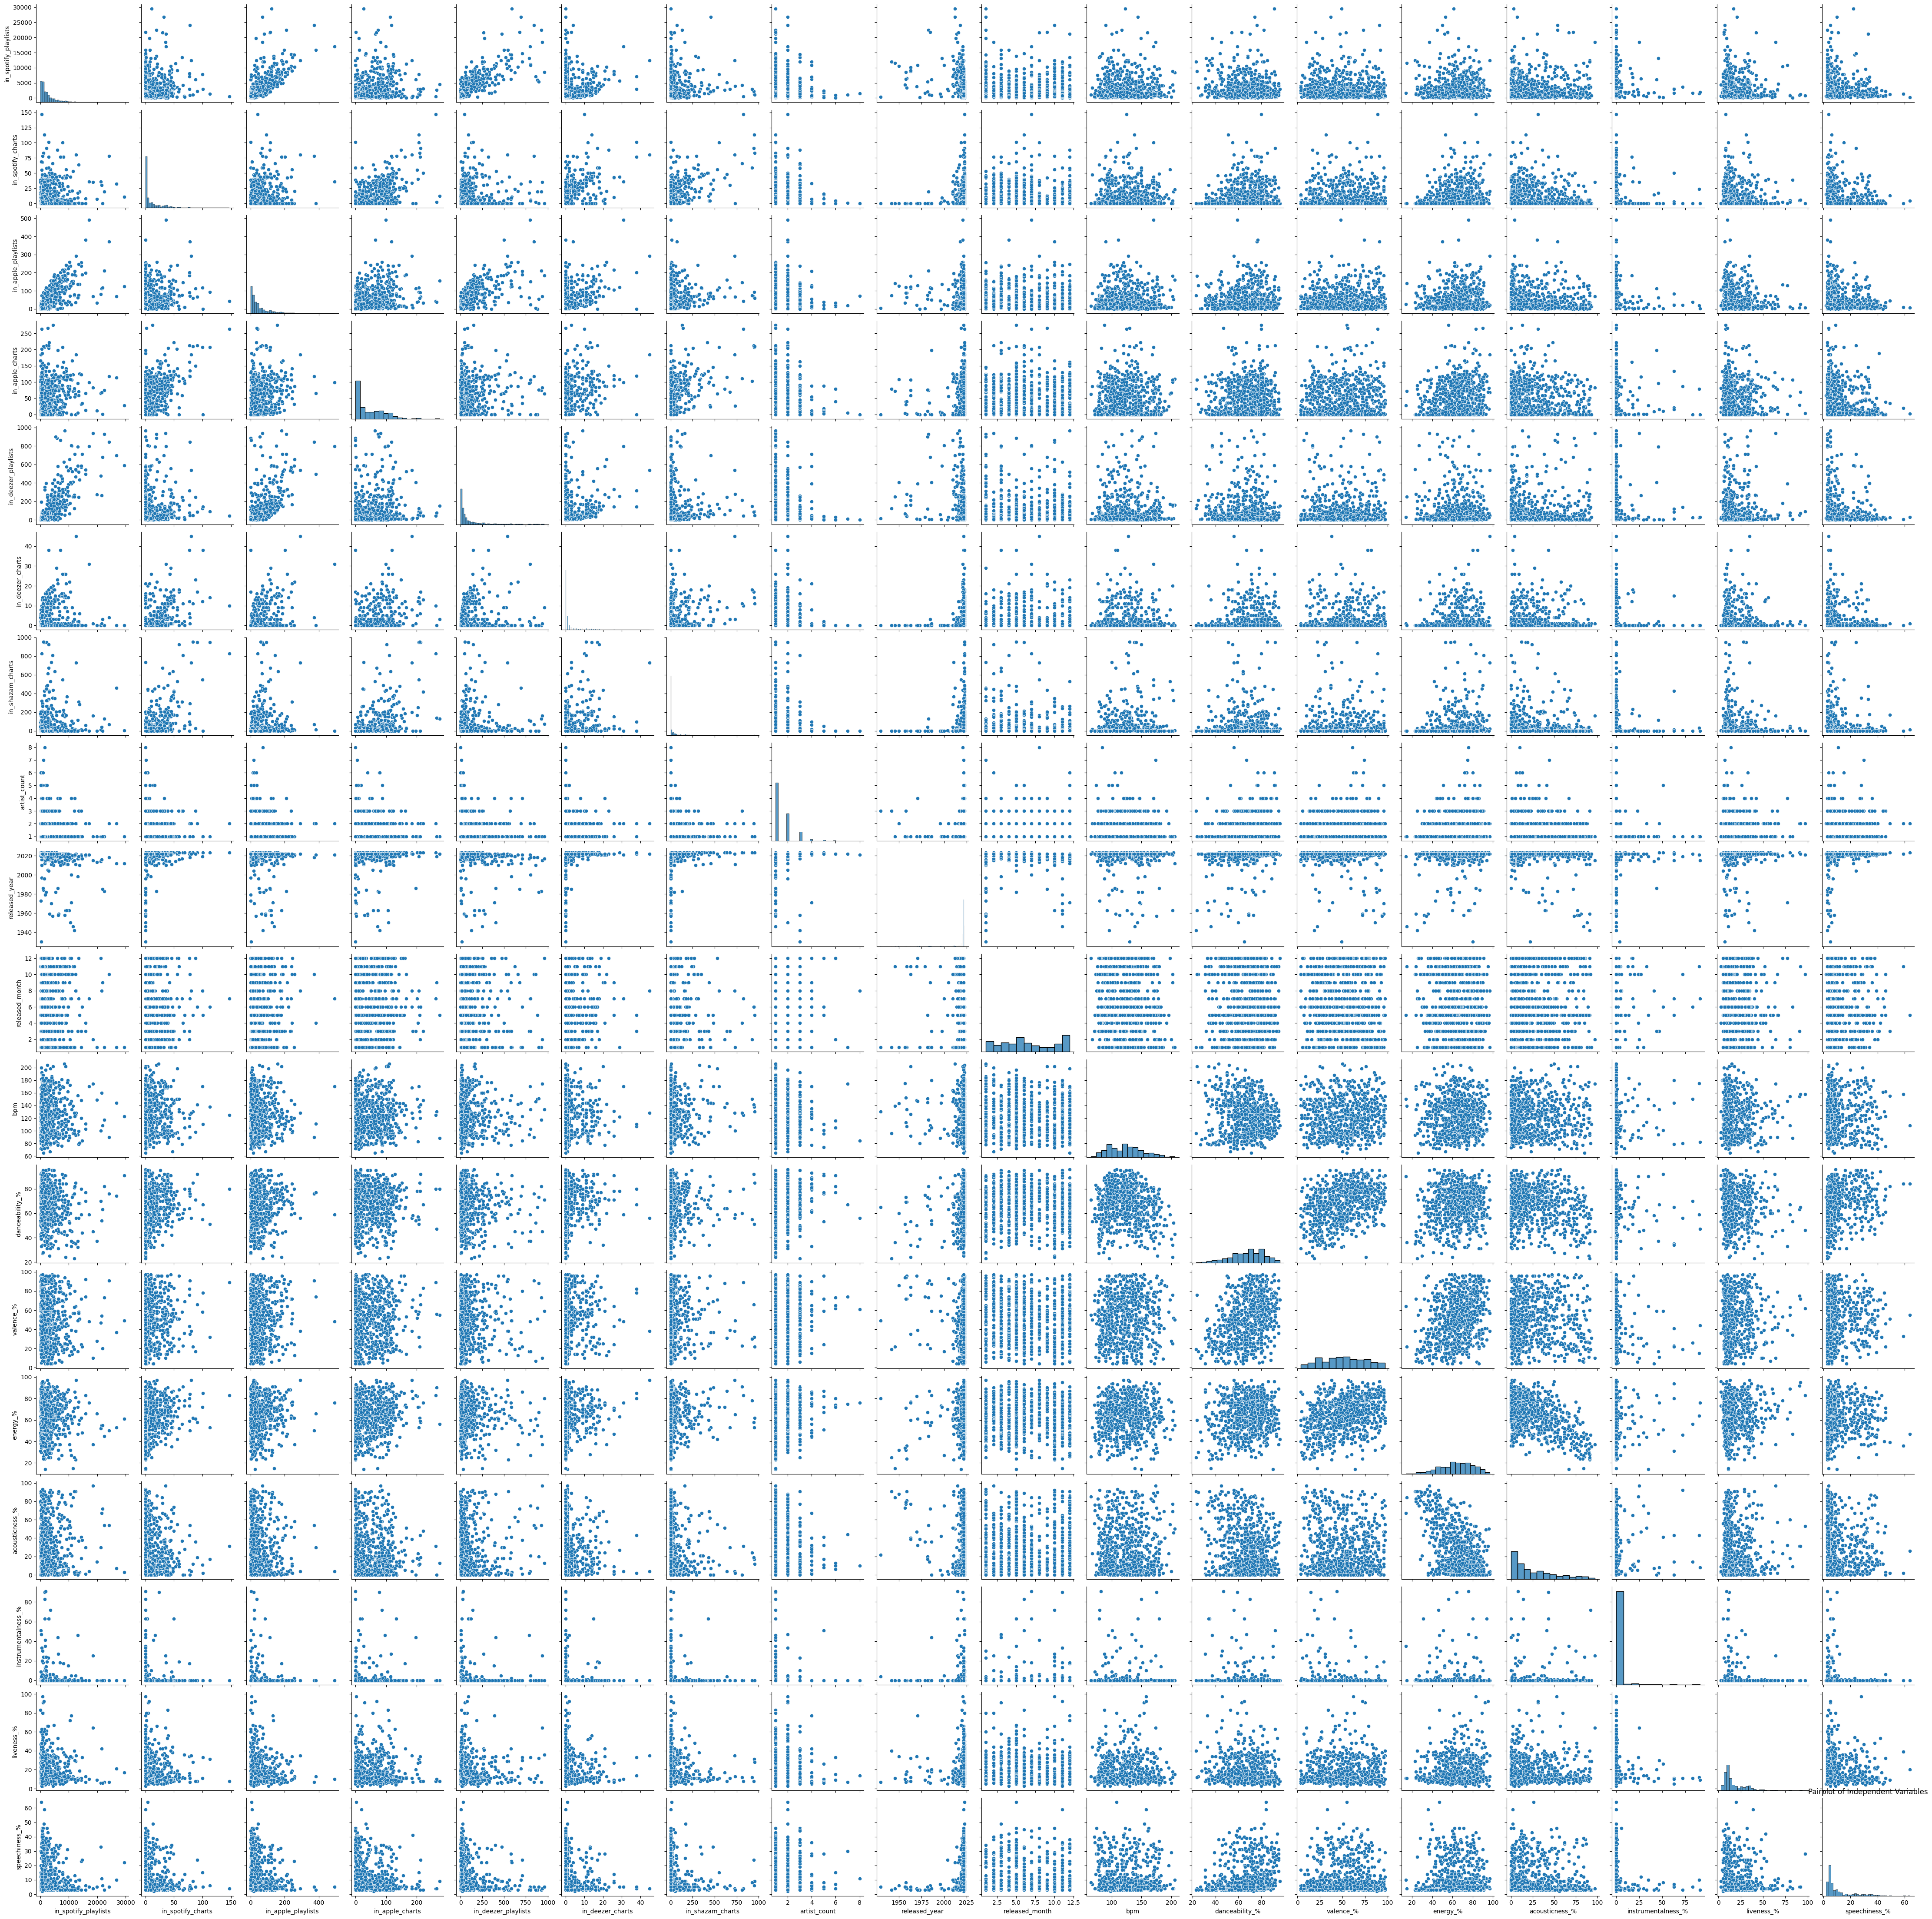

In [16]:
predictor_variables = ['streams']
response_variables = ['in_spotify_playlists',
                      'in_spotify_charts', 'in_apple_playlists', 
                      'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 
                      'artist_count', 'released_year', 'released_month', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
                       'liveness_%', 'speechiness_%']

# Convert columns to numeric and handle missing values
data[predictor_variables] = data[predictor_variables].apply(pd.to_numeric, errors='coerce')
data[response_variables] = data[response_variables].apply(pd.to_numeric, errors='coerce')

# Remove rows with NaN or inf values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

for predictor_var in predictor_variables:
    for response_var in response_variables:
        corr_coef, p_value = pearsonr(data[predictor_var], data[response_var])
        print(f"Pearson correlation coefficient between '{predictor_var}' and '{response_var}': {corr_coef:.2f}")

#==================================================

#in_spotify_playlists
#See if theres outliers for the in_spotify_playlists -
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.in_spotify_playlists)
plt.title("Boxplot of in_spotify_playlists")
plt.ylabel("in_spotify_playlists")
plt.show()

#in_spotify_charts
#See if theres outliers for the in_spotify_charts - 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.in_spotify_charts)
plt.title("Boxplot of in_spotify_charts")
plt.ylabel("in_spotify_charts")
plt.show()

#in_apple_playlists
#See if theres outliers for the in_apple_playlists -
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.in_apple_playlists)
plt.title("Boxplot of in_apple_playlists")
plt.ylabel("in_apple_playlists")
plt.show()

#in_apple_charts
#See if theres outliers for the in_apple_charts -
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.in_apple_charts)
plt.title("Boxplot of in_apple_charts")
plt.ylabel("in_apple_charts")
plt.show()

#in_deezer_playlists
#See if theres outliers for the in_deezer_playlists - 
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.in_deezer_playlists)
plt.title("Boxplot of in_deezer_playlists")
plt.ylabel("in_deezer_playlists")
plt.show()

#in_deezer_charts
#See if theres outliers for the in_deezer_charts -
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.in_deezer_charts)
plt.title("Boxplot of in_deezer_charts")
plt.ylabel("in_deezer_charts")
plt.show()

#in_shazam_charts
#See if theres outliers for the in_shazam_charts - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.in_shazam_charts)
plt.title("Boxplot of in_shazam_charts")
plt.ylabel("in_shazam_charts")
plt.show()

#------------------------------------------

# Scatter plot of streams vs in_spotify_playlists
plt.figure(figsize=(8, 6))
plt.title("streams vs in_spotify_playlists")
plt.xlabel("streams")
plt.ylabel("in_spotify_playlists")
plt.scatter(data['streams'], data['in_spotify_playlists'], alpha=0.5)
plt.plot(np.unique(data['streams']), np.poly1d(np.polyfit(data['streams'], data['in_spotify_playlists'], 1))(np.unique(data['streams'])), color='red')


# Scatter plot of streams vs in_spotify_charts
plt.figure(figsize=(8, 6))
plt.title("streams vs in_spotify_charts")
plt.xlabel("streams")
plt.ylabel("in_spotify_charts")
plt.scatter(data['streams'], data['in_spotify_charts'], alpha=0.5)
plt.plot(np.unique(data['streams']), np.poly1d(np.polyfit(data['streams'], data['in_spotify_charts'], 1))(np.unique(data['streams'])), color='red')



# Scatter plot of streams vs in_apple_playlists
plt.figure(figsize=(8, 6))
plt.title("streams vs in_apple_playlists")
plt.xlabel("streams")
plt.ylabel("in_apple_playlists")
plt.scatter(data['streams'], data['in_apple_playlists'], alpha=0.5)
plt.plot(np.unique(data['streams']), np.poly1d(np.polyfit(data['streams'], data['in_apple_playlists'], 1))(np.unique(data['streams'])), color='red')


# Scatter plot of wins vs in_deezer_playlists
plt.figure(figsize=(8, 6))
plt.title("streams vs in_deezer_playlists")
plt.xlabel("streams")
plt.ylabel("in_deezer_playlists")
plt.scatter(data['streams'], data['in_deezer_playlists'], alpha=0.5)
plt.plot(np.unique(data['streams']), np.poly1d(np.polyfit(data['streams'], data['in_deezer_playlists'], 1))(np.unique(data['streams'])), color='red')



# Scatter plot of streams vs in_deezer_charts
plt.figure(figsize=(8, 6))
plt.title("streams vs in_deezer_charts")
plt.xlabel("streams")
plt.ylabel("in_deezer_charts")
plt.scatter(data['streams'], data['in_deezer_charts'], alpha=0.5)
plt.plot(np.unique(data['streams']), np.poly1d(np.polyfit(data['streams'], data['in_deezer_charts'], 1))(np.unique(data['streams'])), color='red')



# Scatter plot of streams vs in_shazam_charts
plt.figure(figsize=(8, 6))
plt.title("streams vs in_shazam_charts")
plt.xlabel("streams")
plt.ylabel("in_shazam_charts")
plt.scatter(data['streams'], data['in_shazam_charts'], alpha=0.5)
plt.plot(np.unique(data['streams']), np.poly1d(np.polyfit(data['streams'], data['in_shazam_charts'], 1))(np.unique(data['streams'])), color='red')

#===========================================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the independent variables
response_variables = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
                      'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 
                      'artist_count', 'released_year', 'released_month', 'bpm', 'danceability_%', 
                      'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 
                      'speechiness_%']

# Select the independent variables
independent_variables = response_variables

# Calculate the correlation matrix
correlation_matrix = data[independent_variables].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# Create scatterplots between pairs of independent variables
sns.pairplot(data[independent_variables])
plt.title('Pairplot of Independent Variables')
plt.show()




In [17]:
#regression modelling

Magnitude of 'in_spotify_playlists': 1.0000
Magnitude of 'in_spotify_charts': 1.0000
Magnitude of 'in_apple_playlists': 1.0000
Magnitude of 'in_apple_charts': 1.0000
Magnitude of 'in_deezer_playlists': 1.0000
Magnitude of 'in_deezer_charts': 1.0000
Magnitude of 'in_shazam_charts': 1.0000
0     -2512.84492
1     -1591.84492
2     -1668.84492
3      4792.15508
4        67.15508
          ...    
948   -2112.84492
949   -1885.84492
950   -2492.84492
951   -1745.84492
952   -2283.84492
Name: in_spotify_playlists, Length: 748, dtype: float64
0     -48.549465
1     -35.549465
2      -2.549465
3      31.450535
4      -6.549465
         ...    
948   -56.549465
949   -85.549465
950   -86.549465
951   -76.549465
952   -61.549465
Name: in_deezer_playlists, Length: 748, dtype: float64


Text(0, 0.5, 'in_deezer_playlists Gene 2')

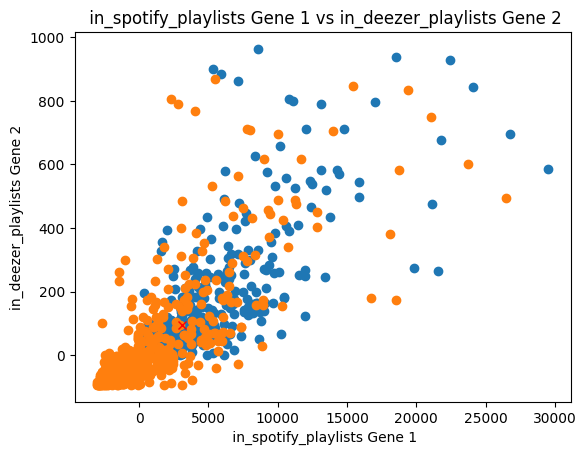

In [18]:
#normalise
#https://www.digitalocean.com/community/tutorials/normalize-data-in-python
from sklearn import preprocessing
import pandas as pd

response_variables = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
                      'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

variables_to_normalize = response_variables

data_to_normalize = data[variables_to_normalize]

normalized_data = preprocessing.normalize(data_to_normalize, axis=0)

normalized_df = pd.DataFrame(normalized_data, columns=variables_to_normalize)

#check if data is normalised

import numpy as np

# Assuming 'normalized_df' is your DataFrame containing the normalized variables
magnitudes = np.linalg.norm(normalized_df, axis=0)

# Print the magnitudes,  for properly normalized data, the magnitudes should be close to 1.
for var, magnitude in zip(normalized_df.columns, magnitudes):
    print(f"Magnitude of '{var}': {magnitude:.4f}")

#--------------------------------------------------
#scale data & PCA
# Assuming 'data' is your DataFrame containing all the variables
predictor_variables = ['streams']
response_variables = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
                      'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

variables_to_scale = predictor_variables + response_variables

data_to_scale = data[variables_to_scale]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_scale)

scaled_df = pd.DataFrame(scaled_data, columns=variables_to_scale)

plt.scatter(data['in_spotify_playlists'], data['in_deezer_playlists'])
plt.title("in_spotify_playlists vs in_deezer_playlists")
plt.xlabel("in_spotify_playlists")
plt.ylabel("in_deezer_playlists")
in_spotify_playlistsaverage = np.average(data['in_spotify_playlists'])
in_deezer_playlistsaverage = np.average(data['in_deezer_playlists'])
plt.plot(in_spotify_playlistsaverage, in_deezer_playlistsaverage, 'rx')


gene1 = data['in_spotify_playlists'] - in_spotify_playlistsaverage
gene2 = data['in_deezer_playlists'] - in_deezer_playlistsaverage
print(gene1)
print(gene2)


plt.scatter(gene1, gene2)
plt.title(" in_spotify_playlists Gene 1 vs in_deezer_playlists Gene 2")
plt.xlabel(" in_spotify_playlists Gene 1")
plt.ylabel("in_deezer_playlists Gene 2")



In [19]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(gene1, gene2)
print(slope)

print(intercept)

0.03308701623730426
1.4876527367707568e-14


In [20]:
#======================================
import statsmodels.api as sm
all_data = sm.add_constant(data['streams'])
model = sm.OLS(data['in_spotify_playlists'], all_data)
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                             OLS Regression Results                             
Dep. Variable:     in_spotify_playlists   R-squared:                       0.577
Model:                              OLS   Adj. R-squared:                  0.577
Method:                   Least Squares   F-statistic:                     1019.
Date:                  Fri, 03 May 2024   Prob (F-statistic):          1.20e-141
Time:                          23:53:34   Log-Likelihood:                -6887.5
No. Observations:                   748   AIC:                         1.378e+04
Df Residuals:                       746   BIC:                         1.379e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        214.8807    125.642

In [21]:
# Second regression analysis with both 'streams' and 'in_spotify_charts' predicting 'streams'
data2 = sm.add_constant(data[['in_spotify_playlists', 'in_spotify_charts']])
model2 = sm.OLS(data['streams'], data2)
result2 = model2.fit()
print(result2.summary())
# Standard error
print(result2.scale**0.5)
print(result2.ssr)

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     537.3
Date:                Fri, 03 May 2024   Prob (F-statistic):          3.45e-145
Time:                        23:53:34   Log-Likelihood:                -15472.
No. Observations:                 748   AIC:                         3.095e+04
Df Residuals:                     745   BIC:                         3.096e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.19e+08 

In [22]:
# Second regression analysis with both 'streams' and 'in_spotify_charts' predicting 'streams'
data2 = sm.add_constant(data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']])
model2 = sm.OLS(data['streams'], data2)
result2 = model2.fit()
print(result2.summary())
# Standard error
print(result2.scale**0.5)
print(result2.ssr)

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     402.7
Date:                Fri, 03 May 2024   Prob (F-statistic):          2.50e-155
Time:                        23:54:32   Log-Likelihood:                -15445.
No. Observations:                 748   AIC:                         3.090e+04
Df Residuals:                     744   BIC:                         3.092e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.004e+08 

In [23]:
# Second regression analysis with both 'streams' and 'in_spotify_charts' predicting 'streams'
data2 = sm.add_constant(data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts']])
model2 = sm.OLS(data['streams'], data2)
result2 = model2.fit()
print(result2.summary())
# Standard error
print(result2.scale**0.5)
print(result2.ssr)

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     301.6
Date:                Fri, 03 May 2024   Prob (F-statistic):          5.41e-154
Time:                        23:54:59   Log-Likelihood:                -15445.
No. Observations:                 748   AIC:                         3.090e+04
Df Residuals:                     743   BIC:                         3.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.011e+08 

In [24]:
# Second regression analysis with both 'streams' and 'in_spotify_charts' predicting 'streams'
data2 = sm.add_constant(data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists']])
model2 = sm.OLS(data['streams'], data2)
result2 = model2.fit()
print(result2.summary())
# Standard error
print(result2.scale**0.5)
print(result2.ssr)

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     264.5
Date:                Fri, 03 May 2024   Prob (F-statistic):          3.71e-162
Time:                        23:55:36   Log-Likelihood:                -15423.
No. Observations:                 748   AIC:                         3.086e+04
Df Residuals:                     742   BIC:                         3.089e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.108e+08 

In [25]:
# Second regression analysis with both 'streams' and 'in_spotify_charts' predicting 'streams'
data2 = sm.add_constant(data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']])
model2 = sm.OLS(data['streams'], data2)
result2 = model2.fit()
print(result2.summary())
# Standard error
print(result2.scale**0.5)
print(result2.ssr)

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     220.1
Date:                Fri, 03 May 2024   Prob (F-statistic):          6.33e-161
Time:                        23:56:04   Log-Likelihood:                -15423.
No. Observations:                 748   AIC:                         3.086e+04
Df Residuals:                     741   BIC:                         3.089e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.107e+08 

In [26]:
# Second regression analysis with both 'streams' and 'in_spotify_charts' predicting 'streams'
data2 = sm.add_constant(data[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']])
model2 = sm.OLS(data['streams'], data2)
result2 = model2.fit()
print(result2.summary())
# Standard error
print(result2.scale**0.5)
print(result2.ssr)

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     209.2
Date:                Fri, 03 May 2024   Prob (F-statistic):          1.18e-170
Time:                        23:56:33   Log-Likelihood:                -15398.
No. Observations:                 748   AIC:                         3.081e+04
Df Residuals:                     740   BIC:                         3.085e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.065e+08 